<a href="https://colab.research.google.com/github/hethatgithub/Global-sales-report-dashboard/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [12]:
# dataframes creation for both training and testing datasets
fashion_train_df = pd.read_csv('/fashion-mnist_test.csv',sep=',')
fashion_test_df = pd.read_csv('/fashion-mnist_test.csv', sep = ',')

Visualization of the dataset

In [13]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [15]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [17]:
fashion_train_df.shape

(10000, 785)

In [18]:
fashion_test_df.shape

(10000, 785)

In [26]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

2.0

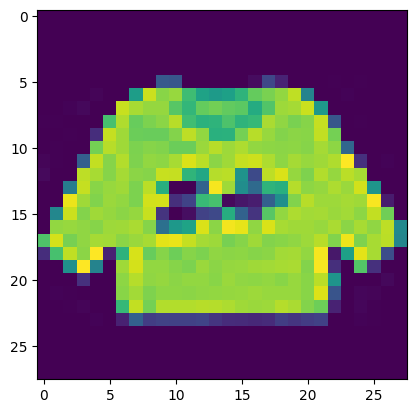

In [37]:
import random
i = random.randint(1, 6000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label


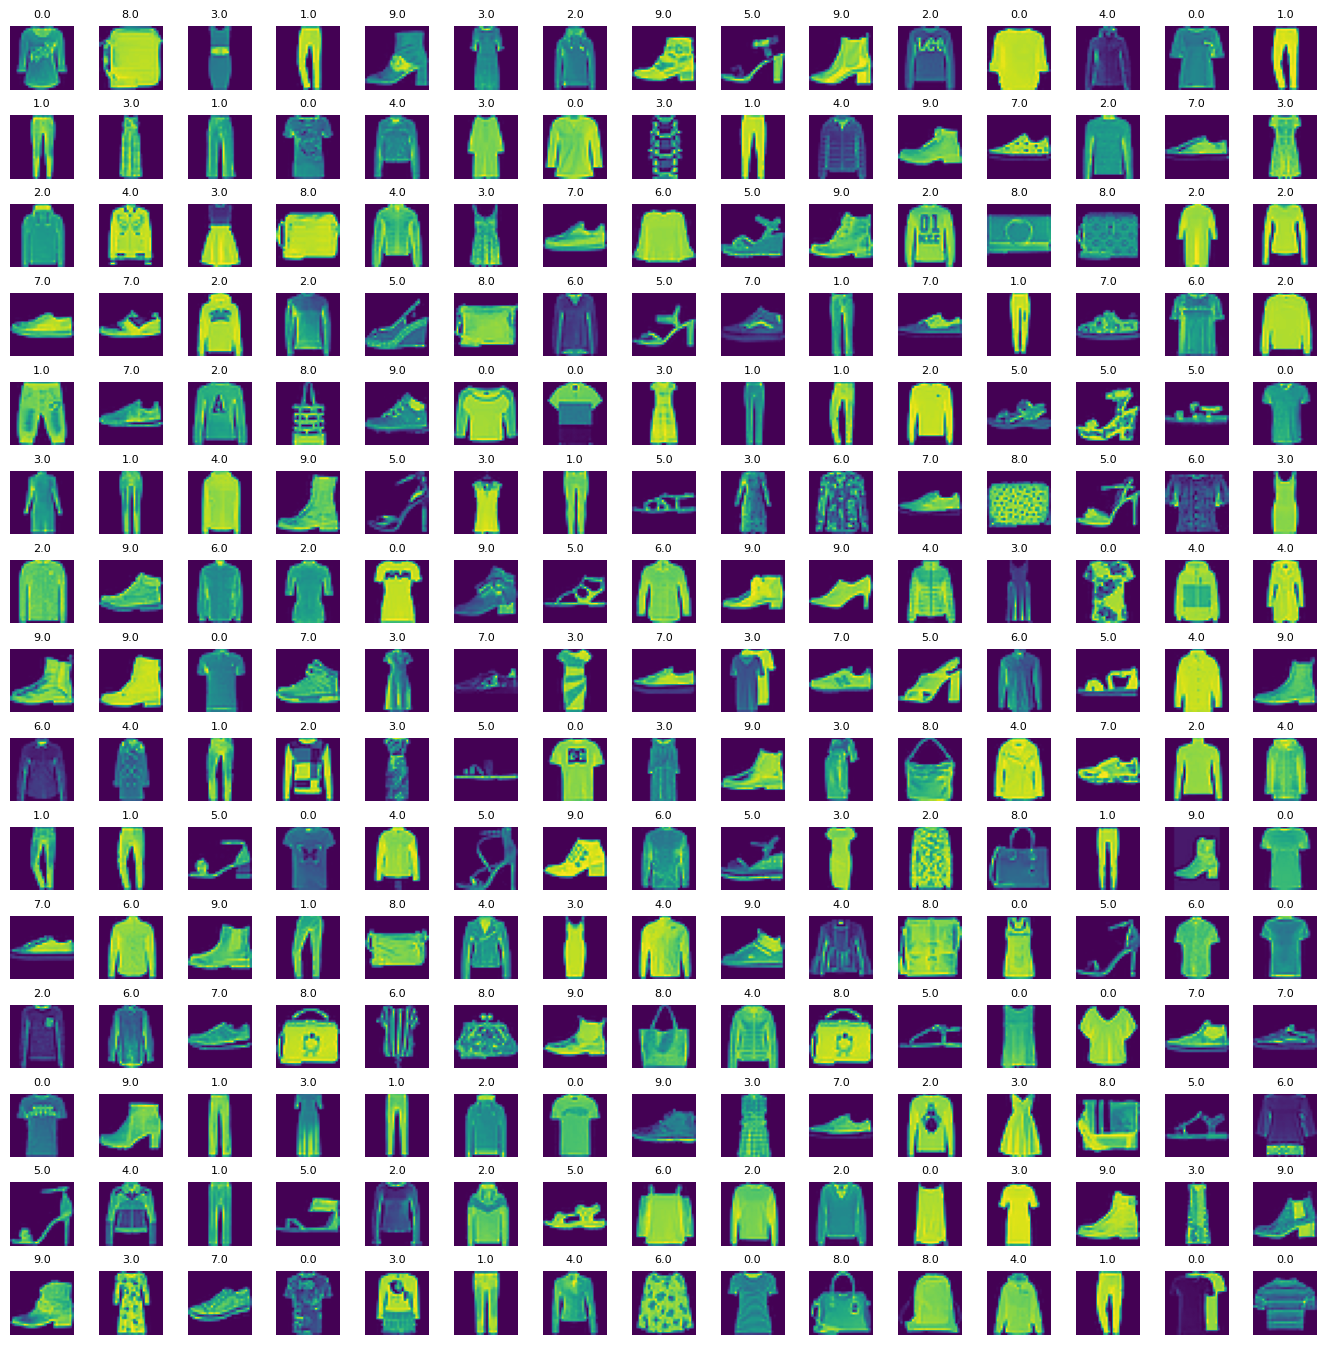

In [38]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [39]:
# Prepare the training and testing dataset
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [41]:
X_train.shape

(8000, 784)

In [42]:
y_train.shape

(8000,)

In [43]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [44]:
X_train.shape

(8000, 28, 28, 1)

In [45]:
X_test.shape

(10000, 28, 28, 1)

In [46]:
X_validate.shape

(2000, 28, 28, 1)

In [47]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [53]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [54]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [56]:
# Number of epochs
epochs = 50

# Fit the model
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)





Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 517ms/step - accuracy: 0.9161 - loss: 0.2263 - val_accuracy: 0.8790 - val_loss: 0.3578
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.9106 - loss: 0.2407 - val_accuracy: 0.8895 - val_loss: 0.3370
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.9219 - loss: 0.2194 - val_accuracy: 0.8920 - val_loss: 0.3352
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 521ms/step - accuracy: 0.9205 - loss: 0.2142 - val_accuracy: 0.8885 - val_loss: 0.3382
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.9224 - loss: 0.2138 - val_accuracy: 0.8875 - val_loss: 0.3360
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.9247 - loss: 0.2127 - val_accuracy: 0.8905 - val_loss: 0.3344
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 522ms/step - accuracy: 0.9312 - loss: 0.1941 - val_accuracy: 0.8900 - val_loss: 0.3523
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 436ms/step - accuracy: 0.9263 - loss: 0.2030 - val_accuracy: 

In [57]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9620 - loss: 0.1458
Test Accuracy : 0.962


In [59]:
import numpy as np

# Get the class probabilities
predictions = cnn_model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


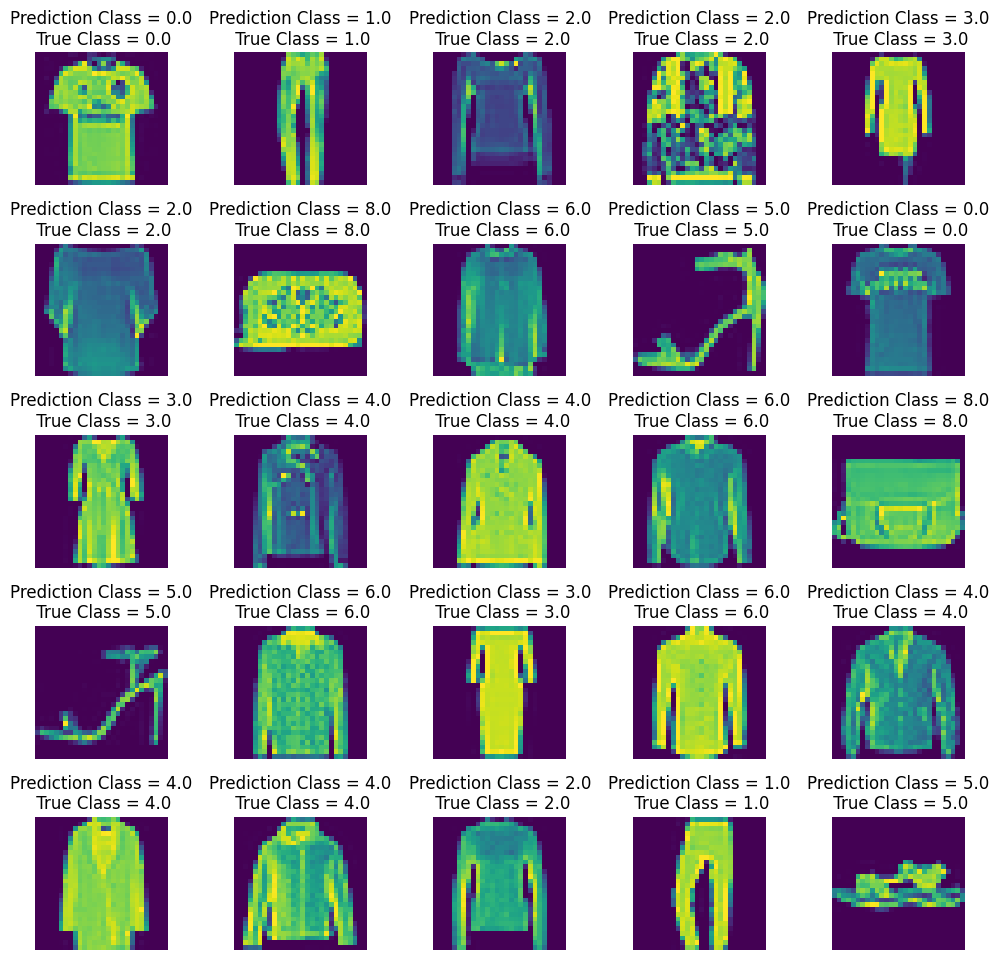

In [60]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

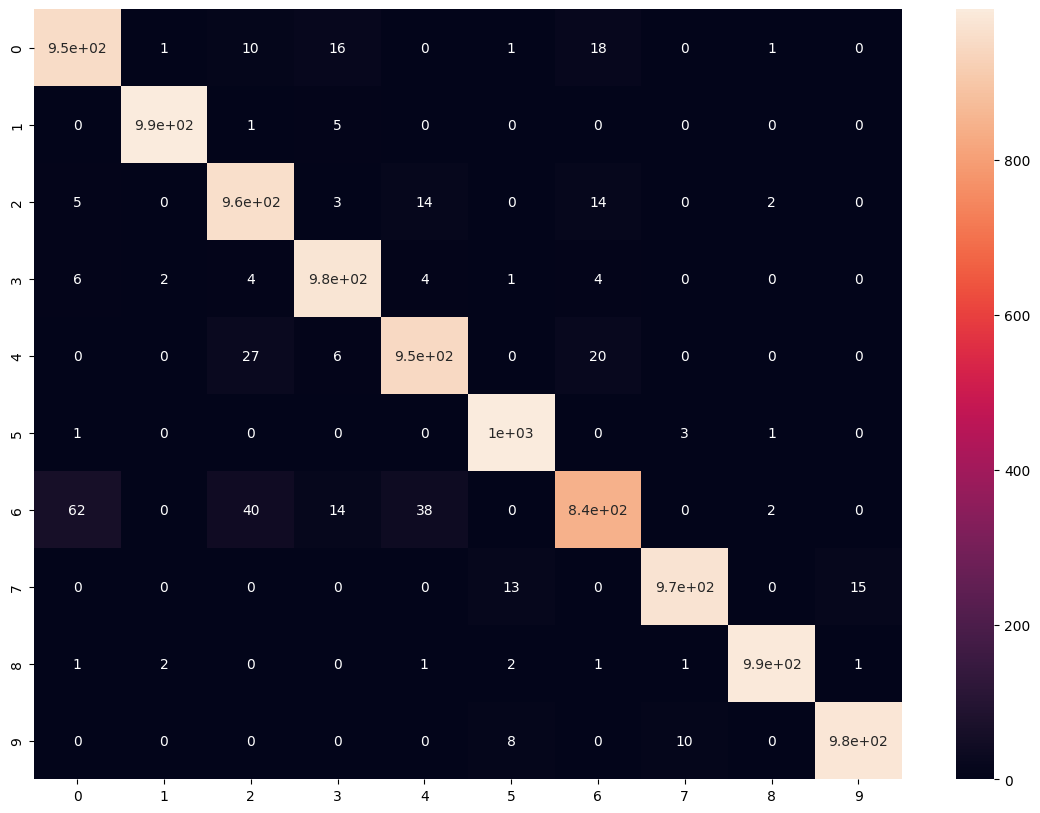

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [62]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.96      0.94      1000
     Class 3       0.96      0.98      0.97      1000
     Class 4       0.94      0.95      0.95      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.94      0.84      0.89      1000
     Class 7       0.99      0.97      0.98      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.98      0.98      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [63]:
# Save the model to a file
cnn_model.save('fashion_mnist_model.h5')


In [64]:
from google.colab import files

# Download the saved model
files.download('fashion_mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('fashion_mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpzz6se867'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132669288819952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669288823648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669288850608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669288854480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289009344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289011632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289015328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289018144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289018848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132669289019376: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [66]:
from google.colab import files

# Download the TensorFlow Lite model
files.download('fashion_mnist_model.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>